### Algorithm to detect and characterize burst dynamics


In [1]:
# Adding GDa to path
import sys
raw_path = '/home/vinicius/storage1/projects/GrayData-Analysis'
sys.path.insert(1, raw_path)
import GDa.stats.bursting                as     bst
from   GDa.stats.util                    import custom_mean, custom_std
from   GDa.session                       import session
from   GDa.temporal_network              import temporal_network
from   GDa.util                          import smooth

import seaborn                           as       sns
import numpy                             as       np
import xarray                            as       xr
import matplotlib.pyplot                 as       plt
import scipy.signal
import time
import os
import h5py

from   xfrites.conn.conn_coh             import conn_coherence_wav
from   tqdm                              import tqdm
from   sklearn.manifold                  import TSNE
from   scipy                             import stats

### Detecting bursts (example)

In [21]:
x         = np.array([0,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,1,1])
mask      = {}
mask['1'] = np.array([1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0]).astype(bool)
mask['2'] = np.logical_not(mask['1'])

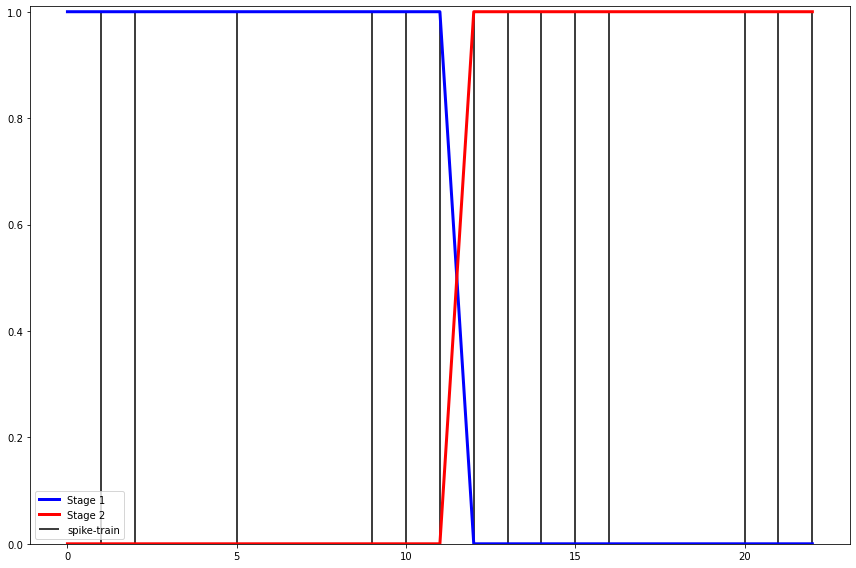

In [22]:
plt.figure(figsize=(12,8))
plt.vlines(np.arange(len(x))[x==1], 0, 1,  color='k', label='spike-train')
plt.plot(mask['1'], lw=3, label='Stage 1', color='blue')
plt.plot(mask['2'], lw=3, label='Stage 2', color='red')
plt.ylim(0,1.01)
plt.legend()
plt.tight_layout()

#### Finding the length of burst durations

In [23]:
print(f'burst lengths = {bst.find_activation_sequences(x, dt=None, pad=False, max_size=None)}')

burst lengths = [2 1 8 3]


#### Finding the length of burst durations for segments of the spike-train using a mask

In [24]:
for idx, key in enumerate(mask):
    print(f'Mask {idx}, burst lengths = {bst.masked_find_activation_sequences(x, mask[key], dt=None, drop_edges=False)}')

Mask 0, burst lengths = [2 1 3]
Mask 1, burst lengths = [5 3]


#### Finding the length of burst durations for segments of the spike-train using a mask dropping the bursts in the edge between masks

In [25]:
for idx, key in enumerate(mask):
    print(f'Mask {idx}, burst lengths = {bst.masked_find_activation_sequences(x, mask[key], dt=None, drop_edges=True)}')

Mask 0, burst lengths = [2 1]
Mask 1, burst lengths = [3]
